6.3 CAREER FOUNDRY FINAL PROJECT 6.3 GEOGRAPHICAL VISUALIZATION WITH PYTHON

In [1]:
 #  What this is doing is importing the correct libraries
    # However Note: geo pandas was not really used but I will use more visualizations with Tableau 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy
import json
import folium


In [2]:

# python -m pip install folium

In [3]:
path = r'C:\Users\rdpor\anaconda3\Scripts\CAREER FOUNDRY ACHIEVMENT 6\Prepared Data\chocolate_bar_ratings_cleaned2.csv'

In [4]:
# This code is importing the chocolate bar ratings data frame
choc_bar_ratings_df_clean2= pd.read_csv(r'C:\Users\rdpor\anaconda3\Scripts\CAREER FOUNDRY ACHIEVMENT 6\Prepared Data\choc_bar_ratings_df_clean2.csv')


In [5]:
# importing the chocolate bar ratings data frame
choc_bar_ratings_df_clean2.head()

,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Most Memorable Characteristics,Rating,Num_of_Ingredients,Specific Ingredients,Cocoa Level,Ingredient Level,Rating Level
0,Manoa,U.S.A.,2012.0,Liberia,"Liberia, batch 174",0.76,"molassses, intense, off, herb",3.25,3,"B,S,C",NaN,3.0,Mid-level
1,Manoa,U.S.A.,2012.0,U.S.A.,"Hawai'i Island, Hamakua, Hawaiian Crown, b. 176",0.76,"oily, tangy, fruit, earthy",2.75,3,"B,S,C",NaN,3.0,Mid-level
2,Manoa,U.S.A.,2012.0,Peru,"Piura, batch 173",0.76,"banana, menthol, medicinal",3.00,3,"B,S,C",NaN,3.0,Mid-level
3,Manoa,U.S.A.,2012.0,U.S.A.,"O'ahu Island, Winward,Maunawili district, b. 151",0.68,"molasses, sweet, cocoa",3.25,3,"B,S,C",NaN,3.0,Mid-level
4,Nanea,U.S.A.,2013.0,U.S.A.,Criollo Blend,0.72,"sandy, spicy, earthy",3.50,0,NaN,NaN,NaN,Mid-level


In [6]:
# getting more info on the imported data set such as the standard deviation
choc_bar_ratings_df_clean2.describe()

,Review Date,Cocoa Percent,Rating,Num_of_Ingredients,Ingredient Level
count,2656.000000,2657.000000,2656.000000,2657.000000,2569.000000
mean,2014.750753,0.716131,3.198795,2.928867,3.029194
std,4.220790,0.055345,0.441614,1.037975,0.900158
min,2006.000000,0.420000,1.000000,0.000000,1.000000
25%,2012.000000,0.700000,3.000000,2.000000,2.000000
50%,2015.000000,0.700000,3.250000,3.000000,3.000000
75%,2018.000000,0.740000,3.500000,4.000000,4.000000
max,2023.000000,1.000000,4.000000,6.000000,6.000000


In [7]:
# What this code is doing is showing which countries have the chocolate companies in them.
choc_bar_ratings_df_clean2['Company Location'].unique()

array(['U.S.A.', 'France', 'Canada', 'U.K.', 'Denmark', 'Lithuania',
       'Spain', 'Puerto Rico', 'Costa Rica', 'Switzerland', 'Brazil',
       'Dominican Republic', 'Madagascar', 'Italy', 'Belgium',
       'Philippines', 'Scotland', 'Peru', 'St. Lucia', 'Vietnam',
       'Martinique', 'Ireland', 'Germany', 'Australia', 'Hungary',
       'Austria', 'Guatemala', 'Finland', 'Iceland', 'Poland',
       'New Zealand', 'Sweden', 'Ecuador', 'South Africa', 'Colombia',
       'Honduras', 'Venezuela', 'Japan', 'Israel', 'Netherlands',
       'Czech Republic', 'Chile', 'Russia', 'South Korea', 'Portugal',
       'Singapore', 'India', 'Mexico', 'Suriname', 'U.A.E.',
       'Sao Tome & Principe', 'Nicaragua', 'Taiwan', 'Norway', 'Thailand',
       'St.Vincent-Grenadines', 'Malaysia', 'El Salvador', 'Grenada',
       'Vanuatu', 'Bolivia', 'France (Reunion)', 'Argentina', 'Ghana',
       'Fiji', 'Wales', nan], dtype=object)

3. Data Cleaning 
This is data cleaning again for choc_bar_ratings_df_clean2 in order to wrangle it with country_geo.  

In [8]:
choc_bar_ratings_df_clean2['Company Location'].nunique()

66

In [9]:
# what this is doing is getting the number of unique company locations that 
# are present in the 'Company Location' column of my choc_bar_ratings_df_clean2 data frame
# there are 67 total
choc_bar_ratings_df_clean2['Company Location'].nunique()

66

In [10]:
# What this is doing is removing any leading and trailing whitespace from the 'Company Location' column
choc_bar_ratings_df_clean2['Company Location'] = choc_bar_ratings_df_clean2['Company Location'].str.strip()

In [11]:
# This code is extracting the unique values from the 'Company Location'
# column of the DataFrame choc_bar_ratings_df_clean2 and converting them 
# into a Python list.  This resulting list will have all the unique company locations
# found in that particular column of my dadaframe. 


(choc_bar_ratings_df_clean2['Company Location'].unique().tolist())

['U.S.A.',
 'France',
 'Canada',
 'U.K.',
 'Denmark',
 'Lithuania',
 'Spain',
 'Puerto Rico',
 'Costa Rica',
 'Switzerland',
 'Brazil',
 'Dominican Republic',
 'Madagascar',
 'Italy',
 'Belgium',
 'Philippines',
 'Scotland',
 'Peru',
 'St. Lucia',
 'Vietnam',
 'Martinique',
 'Ireland',
 'Germany',
 'Australia',
 'Hungary',
 'Austria',
 'Guatemala',
 'Finland',
 'Iceland',
 'Poland',
 'New Zealand',
 'Sweden',
 'Ecuador',
 'South Africa',
 'Colombia',
 'Honduras',
 'Venezuela',
 'Japan',
 'Israel',
 'Netherlands',
 'Czech Republic',
 'Chile',
 'Russia',
 'South Korea',
 'Portugal',
 'Singapore',
 'India',
 'Mexico',
 'Suriname',
 'U.A.E.',
 'Sao Tome & Principe',
 'Nicaragua',
 'Taiwan',
 'Norway',
 'Thailand',
 'St.Vincent-Grenadines',
 'Malaysia',
 'El Salvador',
 'Grenada',
 'Vanuatu',
 'Bolivia',
 'France (Reunion)',
 'Argentina',
 'Ghana',
 'Fiji',
 'Wales',
 nan]

In [24]:
# flin 11

In [25]:
# flin 14

In [12]:
# What this line of code is doing is clarifying the name of to 'France (Reunion)' to simply 'Reunion'
choc_bar_ratings_df_clean2['Company Location'] = choc_bar_ratings_df_clean2['Company Location'].str.replace('France (Reunion)', 'Reunion', regex=False)


5. Consistency Checks 

In [15]:
# What this line of code is doing is checking for missing values
choc_bar_ratings_df_clean2['Rating'].isnull().sum()

1

<Axes: xlabel='Rating', ylabel='Count'>

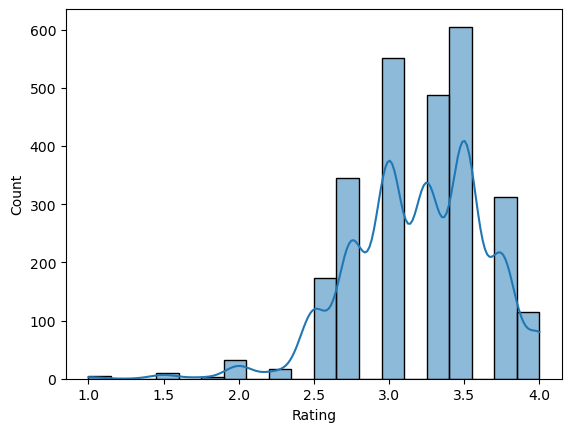

In [16]:
# What this code is doing is creating a (histogram) visual representation of how
# much the ratings are spread out among the chocolate bars in the data frame. 
# This also helps us see which ratings are more common and gives the viewer a better
# overall idea of the distribution of ratings.
# The highest ratings are really 3.0, 3.25, and 3.5


sns.histplot(choc_bar_ratings_df_clean2['Rating'], bins=20, kde = True) # shows extreme values for 'Rating'

In [21]:
# Flin 30
# This code is kinda like organizing the chocolate bars 
# by where their companies are located and then figuring out the average, lowest, and highest
# ratings for each group or place. It also helps see how chocolates from different places compare in terms
# of their ratings. 

choc_bar_ratings_df_clean2.groupby('Company Location').agg({'Rating' : ['mean','min','max']})


Rating            
                      mean   min   max
Company Location                      
Argentina         3.305556  2.75  3.75
Australia         3.375000  2.50  4.00
Austria           3.258333  2.75  3.75
Belgium           3.072917  1.00  4.00
Bolivia           3.250000  2.75  3.75
...                    ...   ...   ...
U.S.A.            3.195940  1.50  4.00
Vanuatu           2.750000  2.50  3.00
Venezuela         3.112903  2.50  3.75
Vietnam           3.263889  2.50  3.75
Wales             2.750000  2.75  2.75

[66 rows x 3 columns]

What I also am doing is focusing more on mode specifically for the aggregations.  It might be the case that mode might best help with the analysis as there may be some outliers pulling the mean up or down thus changing the results.
What this section is diong it looking at mode for aggregations.  

In [22]:
# What this code is doing is creating how to see rating mode values of 'company location'
# It also has the custom function in order to calculate the mode

def calculate_mode(group): return group.mode().iloc[0]  

# This code also has the Group by 'Company Location' and apply the custom function
rating_modes = choc_bar_ratings_df_clean2.groupby
# ('Company Location')['Rating'].apply(calculate_mode).reset_index()

print(rating_modes)

<bound method DataFrame.groupby of      Company (Manufacturer) Company Location  Review Date  \
0                     Manoa           U.S.A.       2012.0   
1                     Manoa           U.S.A.       2012.0   
2                     Manoa           U.S.A.       2012.0   
3                     Manoa           U.S.A.       2012.0   
4                     Nanea           U.S.A.       2013.0   
...                     ...              ...          ...   
2652            Bahen & Co.        Australia       2012.0   
2653          Mast Brothers           U.S.A.       2012.0   
2654          Mast Brothers           U.S.A.       2012.0   
2655            Bahen & Co.        Australia       2012.0   
2656                    NaN              NaN          NaN   

     Country of Bean Origin                  Specific Bean Origin or Bar Name  \
0                   Liberia                                Liberia, batch 174   
1                    U.S.A.   Hawai'i Island, Hamakua, Hawaiian Crown,

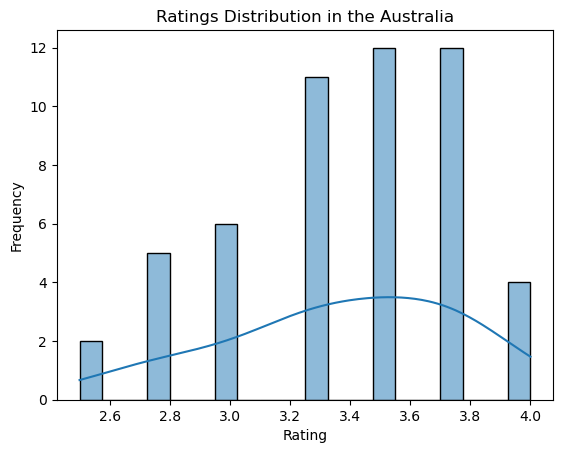

In [23]:
# What this code is doing is creating a histogram of ratings modal values that are using Australia as an example
usa_ratings = choc_bar_ratings_df_clean2[choc_bar_ratings_df_clean2['Company Location'] == 'Australia']
sns.histplot(usa_ratings['Rating'], bins=20, kde=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Ratings Distribution in the Australia')
plt.show()

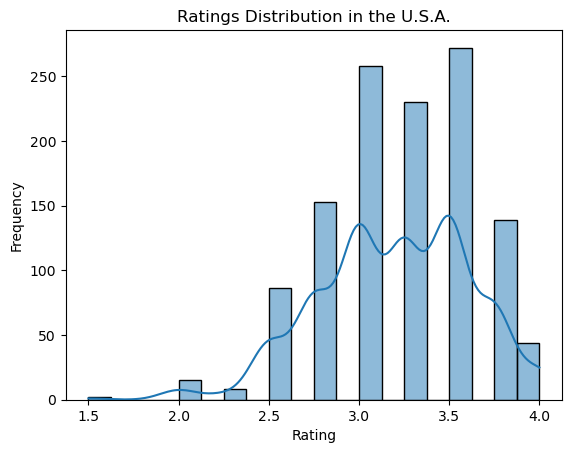

In [93]:
# What this code is doing is creating a  histogram of ratings modal values that are using U.S.A as an example
usa_ratings = choc_bar_ratings_df_clean2[choc_bar_ratings_df_clean2['Company Location'] == 'U.S.A.']
sns.histplot(usa_ratings['Rating'], bins=20, kde=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Ratings Distribution in the U.S.A.')
plt.show()

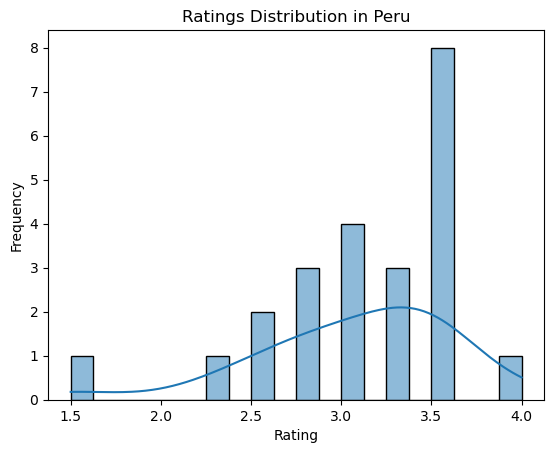

In [24]:
# What this code is doing  is creating a histogram of ratings modal values that are using Peru as an example
usa_ratings = choc_bar_ratings_df_clean2[choc_bar_ratings_df_clean2['Company Location'] == 'Peru']
sns.histplot(usa_ratings['Rating'], bins=20, kde=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Ratings Distribution in Peru')
plt.show()

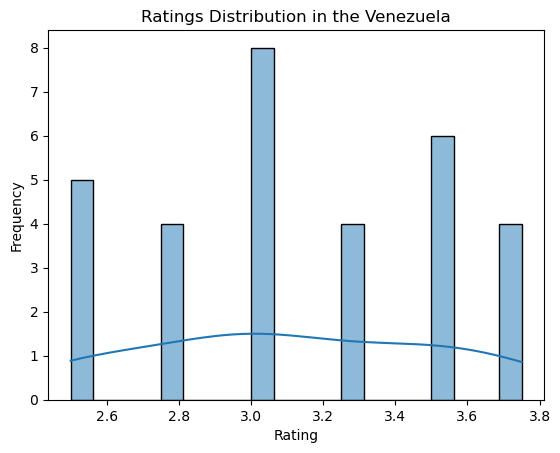

In [25]:
# What this code is doing is  creating a histogram of ratings modal values that are using Venezuela as an example
usa_ratings = choc_bar_ratings_df_clean2[choc_bar_ratings_df_clean2['Company Location'] == 'Venezuela']
sns.histplot(usa_ratings['Rating'], bins=20, kde=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Ratings Distribution in the Venezuela')
plt.show()

Each country has it's own significant data.  I feel like mean is the best way to go because overall the average is a good way to 
create generalizations in the data. 

In [26]:
df_special_countries = choc_bar_ratings_df_clean2['Company Location'].unique()
# what this code is doing in particular is creating a brand new subset from the 
# choc_bar_ratings_df_clean2 data frame and having it focus mainly on the 'company location'

In [27]:
# What this is doing is creating a new dataFrame that has the unique company locations
unique_countries_df = pd.DataFrame({'Company Location': df_special_countries})


With this part, I chose to go with the mode value however the mean and other values are still significant.  By looking at the U.S.A histogram one can see the modal value is 3.5 but by looking at more of the data the mean is 3.19.  This 3.19 mean is obviously because there are values lower than the 3.5 modal value.  What it all comes down to is using the right one based off situational awareness.  The same thing we can see with the Venezuela histogram.  The Venezuela modal value 3.0 and the mean is 3.1.  So this means that there are more values that are greater than 3 that make the histogram have a mean that's higher than 3.  

In [99]:
### ***Note maybe add top 4 countries to this list

In [28]:

# What this particular line of code is doing is saying, 
# "From the DataFrame choc_bar_ratings_df_clean2,
# provide me the unique list of countries where the cocoa
# beans originated, and store that list in a variable 
# called unique_bean_countries." This can be useful for 
# understanding the diversity of bean origins in the dataset.

unique_bean_countries = choc_bar_ratings_df_clean2['Country of Bean Origin'].unique()

In [29]:
# To put it simply, this line of code is
# taking the list of unique country names (unique_bean_countries) 
# and turning it into a new DataFrame (unique_bean_countries_df). 
# Each country name gets its own row in the 'Country of Bean Origin'
# column of this new DataFrame.

unique_bean_countries_df = pd.DataFrame({'Country of Bean Origin': unique_bean_countries})

In [31]:
# What this line of code is doing is checking the Country of Bean Origin Column
unique_bean_countries_df.head()

,Country of Bean Origin
0,Liberia
1,U.S.A.
2,Peru
3,Panama
4,Madagascar


6.  In Summary: Discuss the results and what they mean in the markdown section. 
Does the analysis answer any of your existing researh questions? 
Does the analysis lead you to new research questions? 
It has been interesting to see that there are various results.  It's neat to see that there are various countries that actually don't produce that much cacao beans end up yielding lots of high rated chocolate bars. 
Australia is an example of one of those countries.  Overall, there are a multitude of countries that produce Cocao beans.  


Note: Geopandas was not used because visualizations  particularly Chloropleths will be used a lot more in Tableau

7 Export Data

In [33]:
# exporting the cleaned flavors of cacao data but it needs to be in the "prepared data"
choc_bar_ratings_df_clean2.to_csv(r'C:\Users\rdpor\anaconda3\Scripts\CAREER FOUNDRY ACHIEVMENT 6\Prepared Data\choc_bar_ratings_df_clean3.csv', index=False)